# **Data 690 - Stats & Viz - Final Project**
Student: Alyssa Hayo

Semester: Fall 2020


## **1. Project Background and Details**
This section will focus on my area of issue, the importance of the issue, and information about the data.

### **1.1 Area of Interest**
My area of interest is crime data. I'm focusing specially on crime data that has happened in Denver, Colorado over the past 5 years. The dataset "includes criminal offenses in the City and County of Denver for the previous five calendar years plus the current year to date". (Denvergov.org) This information is originally pulled from the National Incident Based Reporting System (NIBRS). The data is regularly updated Monday-Friday and the organization that maintains the information will also remove reported crimes that are "later determined not to have occured". (Dengergov.org)

### **1.2 Importance**
I personally find crime information interesting and I've never worked with geographically information before. I thought this would be a great opportunity to combine something I'm interested in and something new.

The reason I'm focusing on Denver is because I've always been interested in moving there. Knowing the areas with high crime rates will help me determine the safest area to move once if I ever get a job out there. Other people who are moving to Denver could also use the results of this project to answer similar questions.

### **1.3 Data**
Denvergov.org has open datasets and the [website](https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-crime) has a dataset on crime information that is updated periodically. The dataset "includes criminal offenses in the City and County of Denver for the previous five calendar years plus the current year to date". (Denvergov.org) This information is originally pulled from the National Incident Based Reporting System (NIBRS).

My unit of analysis will be "crime incident". Each crime incident will be its own row in the dataset. There will be approximately 500,000 rows and I'm starting off with 19 columns.

## **2. Initial Summary of Data**
This section will dive into the analysis and all of the code.

### **2.1 Set Up**

#### **2.1.1 Load the Data**
Get the csv from my Google Drive into Google CoLab.

In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# shareable link
link = 'https://drive.google.com/file/d/18hafY1YLpmQFoi2H-jahWnmdq3-8k-sz/view?usp=sharing'

id = link.split('/')[5]
print(id)

18hafY1YLpmQFoi2H-jahWnmdq3-8k-sz


In [3]:
downloaded = drive.CreateFile({'id':'18hafY1YLpmQFoi2H-jahWnmdq3-8k-sz'}) 
downloaded.GetContentFile('crime.csv')  

#### **2.1.2 Import Libraries**

In [4]:
# import libraries
import pandas as pd
import plotly.express as px

import geopandas as gpd
import matplotlib as plt
from shapely.geometry import Point, Polygon

import numpy as np

%matplotlib inline

In [5]:
pip install geopandas

#### **2.1.3 Read the Data in as a Dataframe**
Go from the csv we pulled from Google Drive as a Dataframe.

In [6]:
df = pd.read_csv('crime.csv', encoding='ISO-8859-1')

### **2.2 Examine/View the Data**
Get an idea of what our data looks like and how much data we have.
- Number of rows and columns
- Summary of the data
- Information of the data
- Firt and last 5 rows
- Random sample of rows

In [7]:
# display the number of rows and columns
df.shape

(520220, 19)

There are 520,220 rows and 19 columns.

In [8]:
# look at a summary of the data
df.describe()

INCIDENT_ID    OFFENSE_ID  ...       IS_CRIME     IS_TRAFFIC
count  5.202200e+05  5.202200e+05  ...  520220.000000  520220.000000
mean   4.052281e+09  4.052280e+15  ...       0.749316       0.251253
std    1.343402e+10  1.343402e+16  ...       0.433407       0.433734
min    2.019600e+04  2.019652e+10  ...       0.000000       0.000000
25%    2.016129e+09  2.016130e+15  ...       0.000000       0.000000
50%    2.017737e+09  2.017740e+15  ...       1.000000       0.000000
75%    2.019558e+09  2.019560e+15  ...       1.000000       1.000000
max    2.020890e+12  2.020890e+18  ...       1.000000       1.000000

[8 rows x 12 columns]

In [9]:
# get info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520220 entries, 0 to 520219
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   INCIDENT_ID             520220 non-null  float64
 1   OFFENSE_ID              520220 non-null  float64
 2   OFFENSE_CODE            520220 non-null  int64  
 3   OFFENSE_CODE_EXTENSION  520220 non-null  int64  
 4   OFFENSE_TYPE_ID         520220 non-null  object 
 5   OFFENSE_CATEGORY_ID     520220 non-null  object 
 6   FIRST_OCCURRENCE_DATE   520220 non-null  object 
 7   LAST_OCCURRENCE_DATE    170318 non-null  object 
 8   REPORTED_DATE           520220 non-null  object 
 9   INCIDENT_ADDRESS        471864 non-null  object 
 10  GEO_X                   515726 non-null  float64
 11  GEO_Y                   515726 non-null  float64
 12  GEO_LON                 515726 non-null  float64
 13  GEO_LAT                 515726 non-null  float64
 14  DISTRICT_ID         

In [10]:
# what are the first 5 rows
df.head(5)

INCIDENT_ID    OFFENSE_ID  ...  IS_CRIME  IS_TRAFFIC
0  2.018870e+09  2.018870e+15  ...         1           0
1  2.015664e+09  2.015660e+15  ...         0           1
2  2.017601e+10  2.017600e+16  ...         1           0
3  2.019601e+10  2.019600e+16  ...         1           0
4  2.018862e+09  2.018860e+15  ...         1           0

[5 rows x 19 columns]

In [11]:
# what are the last 5 rows
df.tail(5)

INCIDENT_ID    OFFENSE_ID  ...  IS_CRIME  IS_TRAFFIC
520215  2.020586e+09  2.020590e+15  ...         1           0
520216  2.020550e+09  2.020550e+15  ...         1           0
520217  2.020601e+10  2.020600e+16  ...         1           0
520218  2.020582e+09  2.020580e+15  ...         1           0
520219  2.020601e+10  2.020600e+16  ...         1           0

[5 rows x 19 columns]

In [12]:
# 5 random rows
df.sample(5)

INCIDENT_ID    OFFENSE_ID  ...  IS_CRIME  IS_TRAFFIC
71897   2.018272e+09  2.018270e+15  ...         1           0
295602  2.017500e+10  2.017500e+16  ...         1           0
519209  2.020574e+09  2.020570e+15  ...         0           1
169259  2.016167e+09  2.016170e+15  ...         0           1
69541   2.015347e+09  2.015350e+15  ...         1           0

[5 rows x 19 columns]

### **2.3 Clean the Data**
Check to see if we have any rows with null values, if we do than we will remove those rows.

In [13]:
df.isnull().sum()

INCIDENT_ID                    0
OFFENSE_ID                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE          0
LAST_OCCURRENCE_DATE      349902
REPORTED_DATE                  0
INCIDENT_ADDRESS           48356
GEO_X                       4494
GEO_Y                       4494
GEO_LON                     4494
GEO_LAT                     4494
DISTRICT_ID                    0
PRECINCT_ID                    0
NEIGHBORHOOD_ID                0
IS_CRIME                       0
IS_TRAFFIC                     0
dtype: int64

There are two particular columns that have a lot of null values: *LAST_OCCURRENCE_DATE* and *INCIDENT_ADDRESS*. There are four other columns that have null values, however they are not missing as much data so we will just remove those rows. Those four columns are: *GEO_X*, *GEO_Y*, *GEO_LON*, and *GEO_LAT*. 

In [14]:
# Remove those two columns from the dataframe
df = df.drop(['LAST_OCCURRENCE_DATE','INCIDENT_ADDRESS'], axis=1)

# Did it work?
df.columns

Index(['INCIDENT_ID', 'OFFENSE_ID', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION',
       'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE',
       'REPORTED_DATE', 'GEO_X', 'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID',
       'PRECINCT_ID', 'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC'],
      dtype='object')

It did work! We successfully dropped the columns *LAST_OCCURENCE_DATE* and *INCIDENT_ADDRESS*.

Lets relook at how many null values we have in each column now.

In [15]:
df.isnull().sum()

INCIDENT_ID                  0
OFFENSE_ID                   0
OFFENSE_CODE                 0
OFFENSE_CODE_EXTENSION       0
OFFENSE_TYPE_ID              0
OFFENSE_CATEGORY_ID          0
FIRST_OCCURRENCE_DATE        0
REPORTED_DATE                0
GEO_X                     4494
GEO_Y                     4494
GEO_LON                   4494
GEO_LAT                   4494
DISTRICT_ID                  0
PRECINCT_ID                  0
NEIGHBORHOOD_ID              0
IS_CRIME                     0
IS_TRAFFIC                   0
dtype: int64

We still have some rows with null values. Since there are not a lot of rows, we will just remove those rows.

In [16]:
# Drop rows where at least one element is missing
df = df.dropna()

# Did it work?
df.isnull().sum()

INCIDENT_ID               0
OFFENSE_ID                0
OFFENSE_CODE              0
OFFENSE_CODE_EXTENSION    0
OFFENSE_TYPE_ID           0
OFFENSE_CATEGORY_ID       0
FIRST_OCCURRENCE_DATE     0
REPORTED_DATE             0
GEO_X                     0
GEO_Y                     0
GEO_LON                   0
GEO_LAT                   0
DISTRICT_ID               0
PRECINCT_ID               0
NEIGHBORHOOD_ID           0
IS_CRIME                  0
IS_TRAFFIC                0
dtype: int64

It worked! Lets see what the new shape of our dataframe is.

In [17]:
df.shape

(515726, 17)

We went from 520,220 and 19 columns, to 515726 rows and 17 columns.

## **3. Analysis**
This section will begin to answer some of the questions I hope to answer.
*   How has crime trended over the years?
*   What is the trend per year by district?
*   Are the crimes associated with one particular area in Denver? Are there any hotspots?
*   Are there certain days of the week, times of the day, or seasons that causes crime to trend up or down?
*   Are there certain types of crimes that are committed in specific areas?

### **3.1 Question 1**
How has crime trended over the years?

#### **3.1.1 Pull out day, month, year, and time**

Going to use the *FIRST_OCCURENCE_DATE* as my date and time for the crimes.

In [18]:
df['year'] = pd.DatetimeIndex(df['FIRST_OCCURRENCE_DATE']).year
df['month'] = pd.DatetimeIndex(df['FIRST_OCCURRENCE_DATE']).month
df['time'] = pd.DatetimeIndex(df['FIRST_OCCURRENCE_DATE']).time

# Monday = 0, Sunday = 6
df['day_of_week'] = pd.DatetimeIndex(df['FIRST_OCCURRENCE_DATE']).dayofweek

#### **3.1.2 Group by year and count**

In [19]:
df1 = df[['INCIDENT_ID', 'year']]
df1.head()

INCIDENT_ID  year
0  2.018870e+09  2018
1  2.015664e+09  2015
2  2.017601e+10  2017
3  2.019601e+10  2019
4  2.018862e+09  2018

In [20]:
df1_group = df1.groupby([df1['year']]).agg({'count'})
df1_group = df1_group.reset_index()

# rename INCIDENT_ID as count
df1_group = df1_group.rename(columns=({'INCIDENT_ID':'count'}))

df1_group

year  count
         count
0  2015  88357
1  2016  90677
2  2017  92327
3  2018  92667
4  2019  88871
5  2020  62827

#### **3.1.3 Plot Graph**

In [21]:
fig1 = px.line(df1_group, x='year', y='count', title='Trend in Crime by Year')
fig1.show()

As we can see, the number of crimes each year has been relatively the same. The reason that 2020 is so low is because 2020 is not over yet.

### **3.2 Question 2**
Look at the counts by district. What is the trend per year by district?

#### **3.2.1 Group by year/crime and count**

In [22]:
# How many districts are there?
df['DISTRICT_ID'].nunique()

7

In [23]:
df2 = df[['year','DISTRICT_ID','INCIDENT_ID']]
df2.head()

year  DISTRICT_ID   INCIDENT_ID
0  2018            5  2.018870e+09
1  2015            1  2.015664e+09
2  2017            6  2.017601e+10
3  2019            1  2.019601e+10
4  2018            5  2.018862e+09

In [24]:
df2_group = df2.groupby(['year','DISTRICT_ID']).agg({'count'})
df2_group = df2_group.reset_index()

# rename INCIDENT_ID as count
df2_group = df2_group.rename(columns=({'INCIDENT_ID':'count'}))

df2_group.sample(10)

year DISTRICT_ID  count
                      count
14  2017           1  16350
22  2018           2  13147
36  2020           2   8900
39  2020           5   7152
34  2019           7   1324
26  2018           6  18504
12  2016           6  18180
3   2015           4  13264
31  2019           4  11179
16  2017           3  20322

#### **3.2.2 Plot the data**

In [25]:
fig2 = px.line(df2_group, x='year', y='count', color = 'DISTRICT_ID')
fig2.show()

As you can see, *district 3* and *district 6* have the highest crime rates per year, while *district 7* has the lowest crime rates.

Next we are going to look at the crimes on a map. If *district 3* and *district 6* are larger than *district 7* than this could be why they have a larger crime rate. We would assume that districts with a larger area would have more crime.

### **3.3 Question 3**
Are the crimes associated with one particular area in Denver? Are there any hotspots?

#### **3.3.1 Prepare the data**

In [26]:
df3 = df[['DISTRICT_ID','INCIDENT_ID','GEO_LON', 'GEO_LAT']]
df3.head()

DISTRICT_ID   INCIDENT_ID     GEO_LON    GEO_LAT
0            5  2.018870e+09 -104.866156  39.755561
1            1  2.015664e+09 -105.040760  39.739991
2            6  2.017601e+10 -104.999264  39.753669
3            1  2.019601e+10 -105.029208  39.738134
4            5  2.018862e+09 -104.828868  39.797750

In [27]:
# Create points - describe our longitude and latitude of a data-point
geometry = [Point(xy) for xy in zip(df3['GEO_LON'], df3['GEO_LAT'])]
geometry[:3]

In [28]:
# Set up our geopandas dataframe
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df3, crs=crs, geometry=geometry)
geo_df.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



DISTRICT_ID   INCIDENT_ID  ...    GEO_LAT                     geometry
0            5  2.018870e+09  ...  39.755561  POINT (-104.86616 39.75556)
1            1  2.015664e+09  ...  39.739991  POINT (-105.04076 39.73999)
2            6  2.017601e+10  ...  39.753669  POINT (-104.99926 39.75367)
3            1  2.019601e+10  ...  39.738134  POINT (-105.02921 39.73813)
4            5  2.018862e+09  ...  39.797750  POINT (-104.82887 39.79775)

[5 rows x 5 columns]

Make sure all longitude and latitude points are in the are of Denver.

In [29]:
# center of denver
devner_lat_long = (39.742043, -104.991531)
epsilon = (0.25, 0.3)

# filter out data that doesn't fit our range
geo_df_fit = geo_df[(geo_df['GEO_LAT'] < devner_lat_long[0] + epsilon[0]) & (geo_df['GEO_LAT'] > devner_lat_long[0] - epsilon[0])]
geo_df_fit = geo_df_fit[(geo_df_fit['GEO_LON'] < devner_lat_long[1] + epsilon[1]) & (geo_df_fit['GEO_LON'] > devner_lat_long[1] - epsilon[1])]

#### **3.3.2 Plot the data**

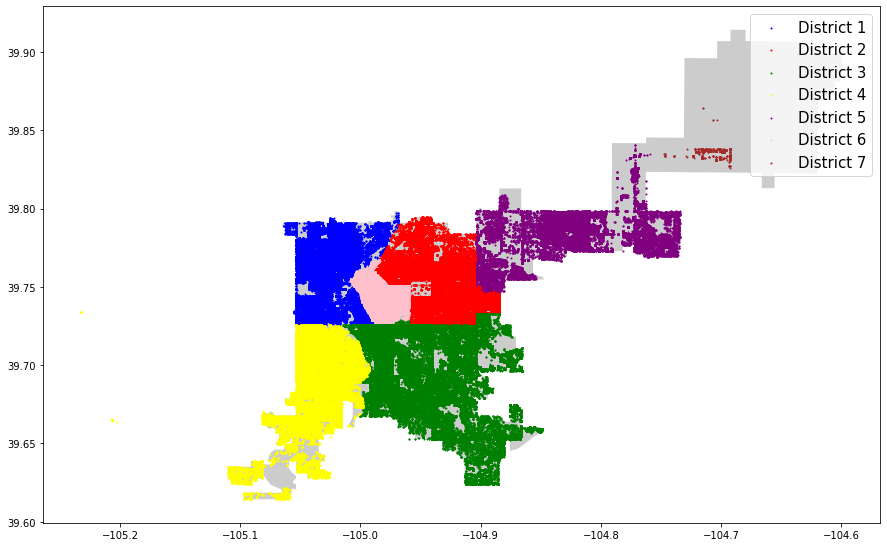

In [30]:
street_map = gpd.read_file("county_boundary.shp")

fig,ax = plt.pyplot.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df_fit[geo_df_fit['DISTRICT_ID']==1].plot(ax=ax,markersize=1,color='blue',marker='o',label='District 1')
geo_df_fit[geo_df_fit['DISTRICT_ID']==2].plot(ax=ax,markersize=1,color='red',marker='o',label='District 2')
geo_df_fit[geo_df_fit['DISTRICT_ID']==3].plot(ax=ax,markersize=1,color='green',marker='o',label='District 3')
geo_df_fit[geo_df_fit['DISTRICT_ID']==4].plot(ax=ax,markersize=1,color='yellow',marker='o',label='District 4')
geo_df_fit[geo_df_fit['DISTRICT_ID']==5].plot(ax=ax,markersize=1,color='purple',marker='o',label='District 5')
geo_df_fit[geo_df_fit['DISTRICT_ID']==6].plot(ax=ax,markersize=1,color='pink',marker='o',label='District 6')
geo_df_fit[geo_df_fit['DISTRICT_ID']==7].plot(ax=ax,markersize=1,color='brown',marker='o',label='District 7')

plt.pyplot.legend(prop={'size':15})

It is hard to see the hotspots on this map because this has been over the past 5 years. I'm going to focus only on 2019 next so hopefully we can get a better idea of the hotspots.

#### **3.3.3 Prepare data for 2019**
Lets only look at 2019 data so hopefully we can see the hotspots better.

In [31]:
df3_2019 = df[['year','DISTRICT_ID','INCIDENT_ID','GEO_LON', 'GEO_LAT']]
df3_2019 = df3_2019[df3_2019['year']==2019]
df3_2019.head()

year  DISTRICT_ID   INCIDENT_ID     GEO_LON    GEO_LAT
3   2019            1  2.019601e+10 -105.029208  39.738134
13  2019            2  2.019739e+09 -104.919802  39.729818
15  2019            4  2.019856e+08 -105.047350  39.700625
38  2019            1  2.019127e+09 -105.000542  39.739501
43  2019            4  2.019316e+09 -105.046748  39.690987

In [32]:
# Create points - describe our longitude and latitude of a data-point
geometry = [Point(xy) for xy in zip(df3_2019['GEO_LON'], df3_2019['GEO_LAT'])]
geometry[:3]

In [33]:
geo_df_2019 = gpd.GeoDataFrame(df3_2019, crs=crs, geometry=geometry)
geo_df_2019.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



year  DISTRICT_ID  ...    GEO_LAT                     geometry
3   2019            1  ...  39.738134  POINT (-105.02921 39.73813)
13  2019            2  ...  39.729818  POINT (-104.91980 39.72982)
15  2019            4  ...  39.700625  POINT (-105.04735 39.70062)
38  2019            1  ...  39.739501  POINT (-105.00054 39.73950)
43  2019            4  ...  39.690987  POINT (-105.04675 39.69099)

[5 rows x 6 columns]

Make sure all longitude and latitude points are in the are of Denver.

In [34]:
# center of denver
devner_lat_long = (39.742043, -104.991531)
epsilon = (0.25, 0.3)

# filter out data that doesn't fit our range
geo_df_fit = geo_df_2019[(geo_df_2019['GEO_LAT'] < devner_lat_long[0] + epsilon[0]) & (geo_df_2019['GEO_LAT'] > devner_lat_long[0] - epsilon[0])]
geo_df_fit = geo_df_fit[(geo_df_fit['GEO_LON'] < devner_lat_long[1] + epsilon[1]) & (geo_df_fit['GEO_LON'] > devner_lat_long[1] - epsilon[1])]

#### **3.3.4 Plot the data for 2019**

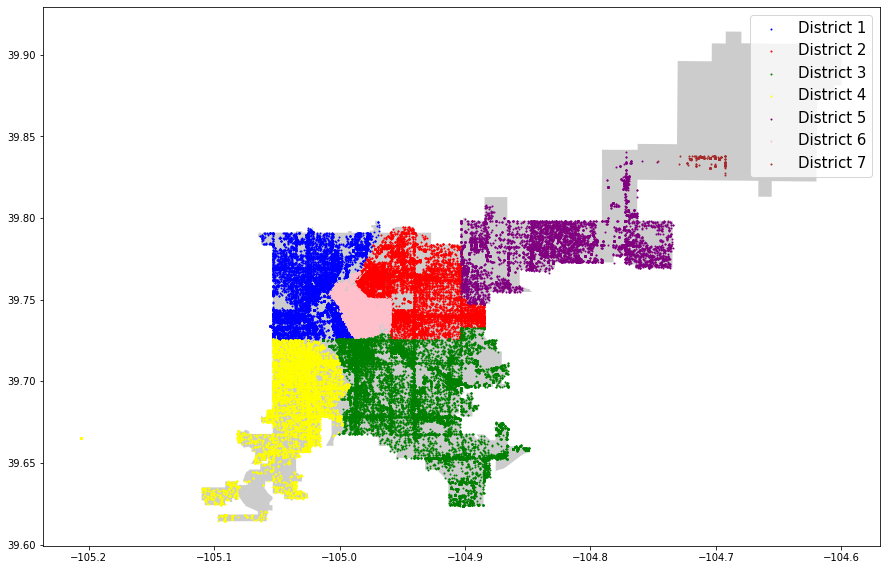

In [35]:
street_map = gpd.read_file("county_boundary.shp")

fig,ax = plt.pyplot.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df_fit[geo_df_fit['DISTRICT_ID']==1].plot(ax=ax,markersize=1,color='blue',marker='o',label='District 1')
geo_df_fit[geo_df_fit['DISTRICT_ID']==2].plot(ax=ax,markersize=1,color='red',marker='o',label='District 2')
geo_df_fit[geo_df_fit['DISTRICT_ID']==3].plot(ax=ax,markersize=1,color='green',marker='o',label='District 3')
geo_df_fit[geo_df_fit['DISTRICT_ID']==4].plot(ax=ax,markersize=1,color='yellow',marker='o',label='District 4')
geo_df_fit[geo_df_fit['DISTRICT_ID']==5].plot(ax=ax,markersize=1,color='purple',marker='o',label='District 5')
geo_df_fit[geo_df_fit['DISTRICT_ID']==6].plot(ax=ax,markersize=1,color='pink',marker='o',label='District 6')
geo_df_fit[geo_df_fit['DISTRICT_ID']==7].plot(ax=ax,markersize=1,color='brown',marker='o',label='District 7')

plt.pyplot.legend(prop={'size':15})

You can see the hotspots a little bit better!

#### **3.3.5 Attempt to graph with ploty**

In [36]:
fig = px.scatter_geo(geo_df_fit, lat=geo_df_fit.geometry.y, lon=geo_df_fit.geometry.x,scope='usa',color='DISTRICT_ID')
fig.show()

Ploty worked very very slowly so I was not able to zoom in on Denver.

### **3.4 Question 4**
Are there certain days of the week, times of the day, or seasons that causes crime to trend up or down?

#### **3.4.1 Days of the Week**

##### **3.4.1.1 Prepare the data**

In [37]:
df4 = df[['INCIDENT_ID','year','day_of_week']]

# Assign weekday to day_of_week: 0 -> Monday, 1 -> Tuesday, etc.
# Code from: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
conditions = [
              (df4['day_of_week'] == 0),
              (df4['day_of_week'] == 1),
              (df4['day_of_week'] == 2),
              (df4['day_of_week'] == 3),
              (df4['day_of_week'] == 4),
              (df4['day_of_week'] == 5),
              (df4['day_of_week'] == 6)
]

values = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
df4['weekday'] = np.select(conditions,values)

df4.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



INCIDENT_ID  year  day_of_week weekday
0  2.018870e+09  2018            3    Thur
1  2.015664e+09  2015            4     Fri
2  2.017601e+10  2017            3    Thur
3  2.019601e+10  2019            5     Sat
4  2.018862e+09  2018            5     Sat

In [38]:
df4_group = df4.groupby(['year','weekday']).agg({'count'})
df4_group = df4_group.reset_index()

# rename INCIDENT_ID as count
df4_group = df4_group.rename(columns=({'INCIDENT_ID':'count'}))

# sort values by year and weekday
df4_group['weekday'] = pd.Categorical(df4_group['weekday'], categories=['Mon','Tues','Wed','Thur','Fri','Sat','Sun'])
df4_group = df4_group.sort_values(['year','weekday'])

df4_group.head(10)

year weekday  count day_of_week
                  count       count
1   2015     Mon  12504       12504
5   2015    Tues  12666       12666
6   2015     Wed  13089       13089
4   2015    Thur  12974       12974
0   2015     Fri  13716       13716
2   2015     Sat  12362       12362
3   2015     Sun  11046       11046
8   2016     Mon  12681       12681
12  2016    Tues  12827       12827
13  2016     Wed  13401       13401

##### **3.4.1.2 Plot the data**

In [39]:
fig4 = px.bar(df4_group, x='year', y='count', color='weekday', barmode='group', title='Crime Trend by Year/Weekday')
fig4.show()

As you can see, Fridays are when the most crimes happen and weekends are when the least amount of crimes happen. Most people work Mon-Fri, so there will be a very routine schedule that can be exploited.

#### **3.4.2 Time of Day**

We are going to divide the time into the groups below.

| Time Zone | Group |
|-----------|-------|
| 0000-0400 | 1     |
| 0400-0800 | 2     |
| 0800-1200 | 3     |
| 1200-1600 | 4     |
| 1600-2000 | 5     |
| 2000-2400 | 6     |

I'll be referring to each time zone by their group when graphing.

##### **3.4.2.1 Prepare the data**

In [40]:
df5 = df[['INCIDENT_ID','year', 'time']]

# get the hour from the time to use for our groups
df5['hour'] = df5['time'].apply(lambda x : x.hour)
df5.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



INCIDENT_ID  year      time  hour
0  2.018870e+09  2018  15:58:00    15
1  2.015664e+09  2015  07:45:00     7
2  2.017601e+10  2017  13:15:00    13
3  2.019601e+10  2019  13:07:00    13
4  2.018862e+09  2018  20:15:00    20

In [41]:
# Assign hour to the correct group
# Code from: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
conditions = [
              (df5['hour'] < 4),
              (df5['hour'] >= 4) & (df5['hour'] < 8),
              (df5['hour'] >= 8) & (df5['hour'] < 12),
              (df5['hour'] >= 12) & (df5['hour'] < 16),
              (df5['hour'] >= 16) & (df5['hour'] < 20),
              (df5['hour'] >= 20) & (df5['hour'] < 24)
]
values = ['1', '2', '3', '4', '5', '6']

df5['hour_group'] = np.select(conditions,values)
df5.sample(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



INCIDENT_ID  year      time  hour hour_group
353364  2.018600e+10  2018  23:55:00    23          6
200715  2.015138e+09  2015  17:00:00    17          5
428202  2.019679e+09  2019  13:30:00    13          4
69174   2.015601e+10  2015  07:45:00     7          2
273592  2.017223e+09  2017  15:45:00    15          4

In [42]:
df5_group = df5.groupby(['year','hour_group']).agg({'count'})
df5_group = df5_group.reset_index()

# rename INCIDENT_ID as count
df5_group = df5_group.rename(columns=({'INCIDENT_ID':'count'}))

df5_group.head(10)

year hour_group  count   time   hour
                    count  count  count
0  2015          1  11051  11051  11051
1  2015          2   6717   6717   6717
2  2015          3  14343  14343  14343
3  2015          4  18623  18623  18623
4  2015          5  21034  21034  21034
5  2015          6  16589  16589  16589
6  2016          1  11188  11188  11188
7  2016          2   7302   7302   7302
8  2016          3  14910  14910  14910
9  2016          4  18789  18789  18789

##### **3.4.2.2 Plot the data**

In [43]:
fig6 = px.bar(df5_group, x='year', y='count', color='hour_group', barmode = 'group', title='Crime Trend by Year/Time')
fig6.show()

As a reminder, these are our time to group mappings.

| Time Zone | Group |
|-----------|-------|
| 0000-0400 | 1     |
| 0400-0800 | 2     |
| 0800-1200 | 3     |
| 1200-1600 | 4     |
| 1600-2000 | 5     |
| 2000-2400 | 6     |

From the above graph, you can see that most of the crimes happen in mid-late afternoon (1200-1600 and 1600-2000). A lot of people work day shifts (0800-1600), which means they would not have any time to commit any crimes. Also due to the hours people work, it makes sense that the hours (0000-0800) with lower crimes rates are when people would be sleeping or getting ready for work.

#### **3.4.3 Seasons**

We are going to divide the time into the groups below.

| Months | Season |
|-----------|-------|
| March - May | Spring     |
| June - August | Summer     |
| September - November | Fall     |
| December - February | Winter     |


##### **3.4.3.1 Prepare the data**

In [44]:
df6 = df[['year', 'month', 'INCIDENT_ID']]

# Assign month to the correct season
# Code from: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
conditions = [
              (df6['month'] == 1),
              (df6['month'] == 2),
              (df6['month'] == 3),
              (df6['month'] == 4),
              (df6['month'] == 5),
              (df6['month'] == 6),
              (df6['month'] == 7),
              (df6['month'] == 8),
              (df6['month'] == 9),
              (df6['month'] == 10),
              (df6['month'] == 11),
              (df6['month'] == 12)
]
values = ['Winter','Winter','Spring','Spring','Spring','Summer','Summer','Summer','Fall','Fall','Fall','Winter']

df6['season'] = np.select(conditions,values)
df6.sample(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



year  month   INCIDENT_ID  season
201654  2018     12  2.018876e+09  Winter
38932   2015      5  2.015600e+10  Spring
14484   2018      2  2.018126e+09  Winter
423418  2017      7  2.017601e+10  Summer
192548  2018     11  2.018501e+10    Fall

In [45]:
df6_group = df6.groupby(['year','season']).agg({'count'})
df6_group = df6_group.reset_index()

# rename INCIDENT_ID as count
df6_group = df6_group.rename(columns=({'INCIDENT_ID':'count'}))

# sort values by year and season
df6_group['season'] = pd.Categorical(df6_group['season'], categories=['Spring','Summer','Fall','Winter'])
df6_group = df6_group.sort_values(['year','season'])

df6_group.head(10)

year  season  month  count
                  count  count
1   2015  Spring  21922  21922
2   2015  Summer  23660  23660
0   2015    Fall  22866  22866
3   2015  Winter  19909  19909
5   2016  Spring  23045  23045
6   2016  Summer  23198  23198
4   2016    Fall  22926  22926
7   2016  Winter  21508  21508
9   2017  Spring  23057  23057
10  2017  Summer  24732  24732

##### **3.4.3.2 Plot the data**

In [46]:
fig7 = px.bar(df6_group, x='year', y='count', color='season', barmode = 'group', title='Crime Trend by Year/Season')
fig7.show()

Most of the crimes happen in the warmer months. During the winter the crime rate drops. 

According to [CurrentResults](https://www.currentresults.com/Weather/Colorado/Places/denver-snowfall-totals-snow-accumulation-averages.php#:~:text=The%20first%20snowfall%20of%20winter,get%20fresh%20snow%20in%20May.), Denver is "normally free of snow every year during June, July, and August". The first snowfall often happens in October and will end in April.

Summer is the only season that Denver will not see snow, so if we assume people are commiting crimes when the weather is nice, than it makes sense that the majority of crimes will happen in the Summer. Spring and Fall will still see snowfall, while Winter will get the most snow.

### **3.5 Question 5**
Are there certain types of crimes that are committed in specific areas? We are only going to look at 2019 data to see the hotspots better.

#### **3.5.1 Prepare the data**

In [47]:
df7 = df[['GEO_LON','GEO_LAT','DISTRICT_ID','OFFENSE_CATEGORY_ID','year','INCIDENT_ID']]
df7 = df7[df7['year']==2019]
df7.head()

GEO_LON    GEO_LAT  DISTRICT_ID OFFENSE_CATEGORY_ID  year   INCIDENT_ID
3  -105.029208  39.738134            1             larceny  2019  2.019601e+10
13 -104.919802  39.729818            2             larceny  2019  2.019739e+09
15 -105.047350  39.700625            4            burglary  2019  2.019856e+08
38 -105.000542  39.739501            1    all-other-crimes  2019  2.019127e+09
43 -105.046748  39.690987            4            burglary  2019  2.019316e+09

In [48]:
# Create points - describe our longitude and latitude of a data-point
geometry = [Point(xy) for xy in zip(df7['GEO_LON'], df7['GEO_LAT'])]
geometry[:3]

In [49]:
# Set up our geopandas dataframe
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df7, crs=crs, geometry=geometry)
geo_df.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



GEO_LON    GEO_LAT  ...   INCIDENT_ID                     geometry
3  -105.029208  39.738134  ...  2.019601e+10  POINT (-105.02921 39.73813)
13 -104.919802  39.729818  ...  2.019739e+09  POINT (-104.91980 39.72982)
15 -105.047350  39.700625  ...  2.019856e+08  POINT (-105.04735 39.70062)
38 -105.000542  39.739501  ...  2.019127e+09  POINT (-105.00054 39.73950)
43 -105.046748  39.690987  ...  2.019316e+09  POINT (-105.04675 39.69099)

[5 rows x 7 columns]

Make sure all of the points are in Denver.

In [50]:
# center of denver
devner_lat_long = (39.742043, -104.991531)
epsilon = (0.25, 0.3)

# filter out data that doesn't fit our range
geo_df_fit = geo_df[(geo_df['GEO_LAT'] < devner_lat_long[0] + epsilon[0]) & (geo_df['GEO_LAT'] > devner_lat_long[0] - epsilon[0])]
geo_df_fit = geo_df_fit[(geo_df_fit['GEO_LON'] < devner_lat_long[1] + epsilon[1]) & (geo_df_fit['GEO_LON'] > devner_lat_long[1] - epsilon[1])]

In [51]:
# what are the unique offense category ids?
geo_df_fit['OFFENSE_CATEGORY_ID'].unique()

array(['larceny', 'burglary', 'all-other-crimes', 'auto-theft',
       'traffic-accident', 'public-disorder', 'drug-alcohol',
       'theft-from-motor-vehicle', 'aggravated-assault', 'robbery',
       'other-crimes-against-persons', 'white-collar-crime', 'murder',
       'arson'], dtype=object)

#### **3.5.2 Plot the data**

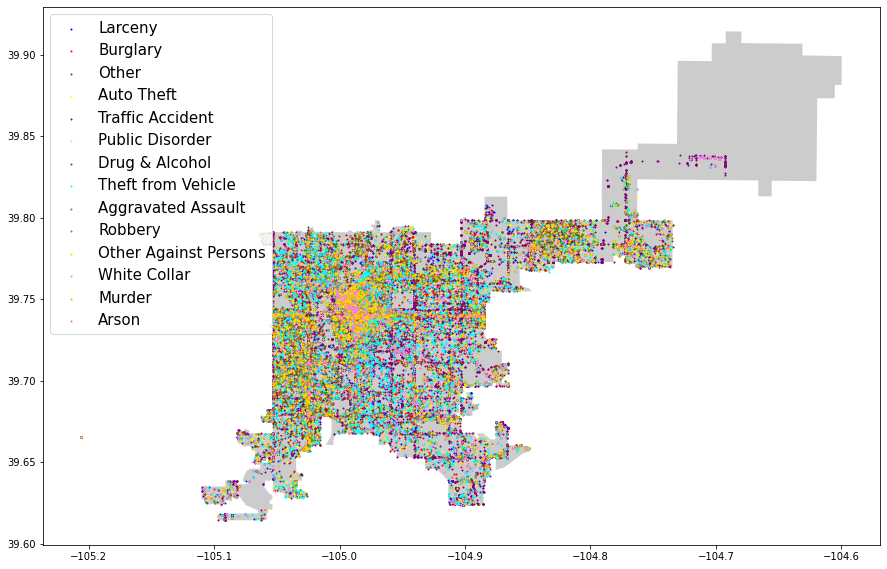

In [52]:
street_map = gpd.read_file("county_boundary.shp")

fig,ax = plt.pyplot.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='larceny'].plot(ax=ax,markersize=1,color='blue',marker='o',label='Larceny')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='burglary'].plot(ax=ax,markersize=1,color='red',marker='o',label='Burglary')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='all-other-crimes'].plot(ax=ax,markersize=1,color='green',marker='o',label='Other')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='auto-theft'].plot(ax=ax,markersize=1,color='yellow',marker='o',label='Auto Theft')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='traffic-accident'].plot(ax=ax,markersize=1,color='purple',marker='o',label='Traffic Accident')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='public-disorder'].plot(ax=ax,markersize=1,color='pink',marker='o',label='Public Disorder')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='drug-alcohol'].plot(ax=ax,markersize=1,color='brown',marker='o',label='Drug & Alcohol')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='theft-from-motor-vehicle'].plot(ax=ax,markersize=1,color='cyan',marker='o',label='Theft from Vehicle')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='aggravated-assault'].plot(ax=ax,markersize=1,color='olive',marker='o',label='Aggravated Assault')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='robbery'].plot(ax=ax,markersize=1,color='chocolate',marker='o',label='Robbery')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='other-crimes-against-persons'].plot(ax=ax,markersize=1,color='gold',marker='o',label='Other Against Persons')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='white-collar-crime'].plot(ax=ax,markersize=1,color='violet',marker='o',label='White Collar')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='murder'].plot(ax=ax,markersize=1,color='orange',marker='o',label='Murder')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='arson'].plot(ax=ax,markersize=1,color='coral',marker='o',label='Arson')

plt.pyplot.legend(prop={'size':15})

We can't see much with all of the different colors. Lets try focusing on one specific district.

#### **3.5.3 Prepare the data for district 6**
We are only going to look at district 6 since that is one of the smaller districts and hopefully we can see distributions better, still only looking at 2019.

In [53]:
df8 = df[['GEO_LON','GEO_LAT','DISTRICT_ID','OFFENSE_CATEGORY_ID','year','INCIDENT_ID']]
df8 = df8[df8['year']==2019]
df8 = df8[df8['DISTRICT_ID']==6]
df8.head()

GEO_LON    GEO_LAT  DISTRICT_ID OFFENSE_CATEGORY_ID  year   INCIDENT_ID
69  -104.987408  39.745061            6    traffic-accident  2019  2.019188e+08
94  -104.994943  39.741706            6    traffic-accident  2019  2.019409e+08
133 -104.985866  39.751237            6             larceny  2019  2.019600e+10
141 -104.990974  39.742776            6    traffic-accident  2019  2.019580e+09
159 -104.992029  39.735009            6  aggravated-assault  2019  2.019494e+09

In [54]:
# Create points - describe our longitude and latitude of a data-point
geometry = [Point(xy) for xy in zip(df8['GEO_LON'], df8['GEO_LAT'])]
geometry[:3]

In [55]:
# Set up our geopandas dataframe
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df8, crs=crs, geometry=geometry)
geo_df.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



GEO_LON    GEO_LAT  ...   INCIDENT_ID                     geometry
69  -104.987408  39.745061  ...  2.019188e+08  POINT (-104.98741 39.74506)
94  -104.994943  39.741706  ...  2.019409e+08  POINT (-104.99494 39.74171)
133 -104.985866  39.751237  ...  2.019600e+10  POINT (-104.98587 39.75124)
141 -104.990974  39.742776  ...  2.019580e+09  POINT (-104.99097 39.74278)
159 -104.992029  39.735009  ...  2.019494e+09  POINT (-104.99203 39.73501)

[5 rows x 7 columns]

In [56]:
# make sure all points are in denver
# center of denver
devner_lat_long = (39.742043, -104.991531)
epsilon = (0.05, 0.05)

# filter out data that doesn't fit our range
geo_df_fit = geo_df[(geo_df['GEO_LAT'] < devner_lat_long[0] + epsilon[0]) & (geo_df['GEO_LAT'] > devner_lat_long[0] - epsilon[0])]
geo_df_fit = geo_df_fit[(geo_df_fit['GEO_LON'] < devner_lat_long[1] + epsilon[1]) & (geo_df_fit['GEO_LON'] > devner_lat_long[1] - epsilon[1])]

In [57]:
# what are the unique offense category ids?
geo_df_fit['OFFENSE_CATEGORY_ID'].unique()

array(['traffic-accident', 'larceny', 'aggravated-assault',
       'theft-from-motor-vehicle', 'all-other-crimes', 'robbery',
       'public-disorder', 'auto-theft', 'drug-alcohol',
       'other-crimes-against-persons', 'burglary', 'white-collar-crime',
       'arson', 'murder'], dtype=object)

#### **3.5.4 Plot the data for 2019 and District 6**

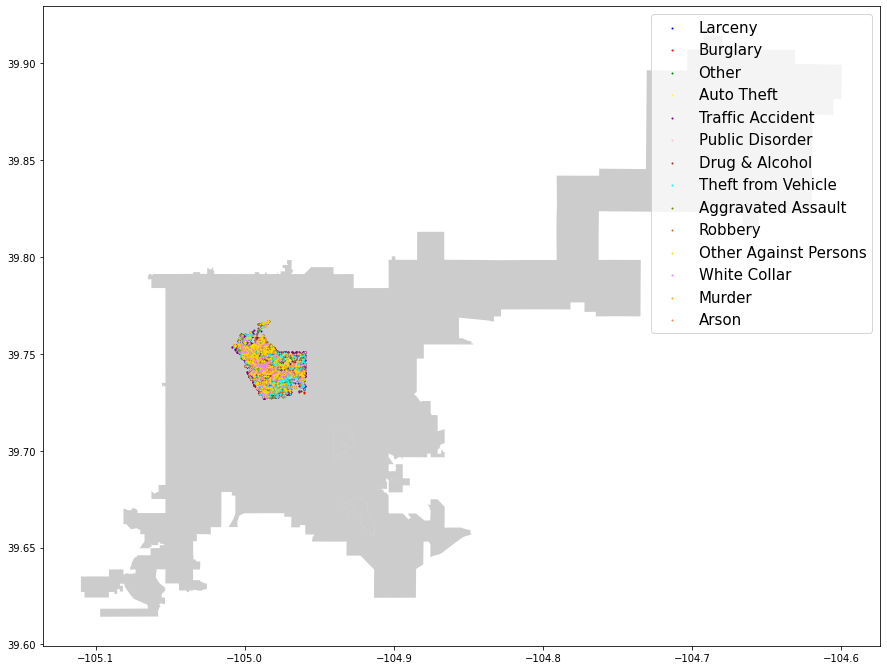

In [58]:
street_map = gpd.read_file("county_boundary.shp")

fig,ax = plt.pyplot.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='larceny'].plot(ax=ax,markersize=1,color='blue',marker='o',label='Larceny')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='burglary'].plot(ax=ax,markersize=1,color='red',marker='o',label='Burglary')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='all-other-crimes'].plot(ax=ax,markersize=1,color='green',marker='o',label='Other')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='auto-theft'].plot(ax=ax,markersize=1,color='yellow',marker='o',label='Auto Theft')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='traffic-accident'].plot(ax=ax,markersize=1,color='purple',marker='o',label='Traffic Accident')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='public-disorder'].plot(ax=ax,markersize=1,color='pink',marker='o',label='Public Disorder')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='drug-alcohol'].plot(ax=ax,markersize=1,color='brown',marker='o',label='Drug & Alcohol')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='theft-from-motor-vehicle'].plot(ax=ax,markersize=1,color='cyan',marker='o',label='Theft from Vehicle')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='aggravated-assault'].plot(ax=ax,markersize=1,color='olive',marker='o',label='Aggravated Assault')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='robbery'].plot(ax=ax,markersize=1,color='chocolate',marker='o',label='Robbery')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='other-crimes-against-persons'].plot(ax=ax,markersize=1,color='gold',marker='o',label='Other Against Persons')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='white-collar-crime'].plot(ax=ax,markersize=1,color='violet',marker='o',label='White Collar')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='murder'].plot(ax=ax,markersize=1,color='orange',marker='o',label='Murder')
geo_df_fit[geo_df_fit['OFFENSE_CATEGORY_ID']=='arson'].plot(ax=ax,markersize=1,color='coral',marker='o',label='Arson')

plt.pyplot.legend(prop={'size':15})

We still can't see much. Lets try it with ploty to see if we can zoom in. Although ploty took too long to load last time, maybe it will work with less data points.

#### **3.5.5 Try with Plotly**

In [59]:
fig = px.scatter_geo(geo_df_fit, lat=geo_df_fit.geometry.y, lon=geo_df_fit.geometry.x,scope='usa',color='OFFENSE_CATEGORY_ID')
fig.show()

Once again plotly is taking too long to load when you try to zoom in on the data.

## **4. Summary**
These are the questions that were asked in the Analysis section:
* How has crime trended over the years?
* What is the trend per year by district?
* Are the crimes associated with one particular area in Denver? Are there any hotspots?
* Are there certain days of the week, times of the day, or seasons that causes crime to trend up or down?
* Are there certain types of crimes that are committed in specific areas?

Question 1: We did not see much of a different in crime rates over the years.

Question 2: We saw that district 3 and district 6 has the highest crime rates per year, while district 7 had the lowest crime rates. We see in question 3, that district 3 was one of the larger districts which could account for why it had a larger crime rate. However district 6 was one of the smaller districts but it is the center of the city, which could explain why it had a higher rate. District 7 was far off the center of the city and had a very sparse crime rate.

Question 3: We could not see a lot when looking at the crime for all 5 years, however we could see more sparse areas when we only look at 2019. The crime was very dense in the center of city and was more sparse as you moved away from the city.

Question 4: 
* We saw an increase in crime rates on Fridays and a decrease in crime over the weekend. People work during the week and have a more routine scheudle, which could be exploited. Also during a typical work week, you'll see more traffic than you'll see on the weekend and that could lead to more traffic accidents. 
* We saw that most crimes are committed in the mid-late afternoon (1200-2000), which would correlate when people would be getting of between work and school. Also due to the hours people work, it makes sense that the hours (0000-0800) with lower crimes rates are when people would be sleeping or getting ready for work.
* The last thing we looked at were the seasons. Most crimes were committed during the warmer summer months, with the least amount of crime being committed in the winter. There is still some snow during the Fall and Spring, which would make it more difficult to commit crimes.

Question 5: It was very difficult to see if certain types of crimes were committed in specific areas. I tried to limit it to one year and one district, however I could still not zoom in enough to see specifics on the 14 different offense category IDs. Plotly was taking too long to load, so I was not able to zoom in using that either.


Overall I have a better idea of where I could move out in Denver, specifically away from the center of the city. I also know what times, days of the week, and seasons that I could expect a higher number of crimes.